In [1]:
import glob
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [2]:
data = pd.read_csv("tennis_train_dataset.csv")

In [3]:
data

,tourney_date,tourney_name,tourney_level,surface,player_one_id,player_one,player_two_id,player_two,player_one_ht,player_two_ht,...,player_one_df,player_two_df,player_one_rank,player_two_rank,player_one_rank_points,player_two_rank_points,FTR,player_one_elo_rating,player_two_elo_rating,surface_encoded
0,2010-01-03,Brisbane,A,Hard,104053,Andy Roddick,103429,Peter Luczak,188.0,183.0,...,0.0,2.0,7.0,77.0,4410.0,598.0,W,2204,1689,3
1,2010-01-03,Brisbane,A,Hard,104958,Carsten Ball,104999,Mischa Zverev,198.0,190.0,...,3.0,2.0,134.0,78.0,400.0,590.0,W,1808,1810,3
2,2010-01-03,Brisbane,A,Hard,103813,Jarkko Nieminen,104755,Richard Gasquet,185.0,185.0,...,0.0,4.0,88.0,52.0,568.0,850.0,L,1882,2030,3
3,2010-01-03,Brisbane,A,Hard,104571,Marcos Baghdatis,103888,Mardy Fish,183.0,188.0,...,5.0,3.0,42.0,55.0,945.0,790.0,W,2010,1967,3
4,2010-01-03,Brisbane,A,Hard,103248,Harel Levy,103566,Michael Llodra,185.0,190.0,...,0.0,0.0,119.0,67.0,461.0,649.0,W,1752,1919,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25546,2022-03-04,Davis Cup QLS R1: ITA vs SVK,D,Hard,207518,Lorenzo Musetti,105613,Norbert Gombos,185.0,193.0,...,1.0,1.0,57.0,110.0,1000.0,620.0,W,1836,1767,3
25547,2022-03-04,Davis Cup QLS R1: KAZ vs NOR,D,Hard,134770,Casper Ruud,105062,Mikhail Kukushkin,183.0,183.0,...,1.0,0.0,8.0,160.0,3915.0,386.0,W,2129,1748,3
25548,2022-03-04,Davis Cup QLS R1: KAZ vs NOR,D,Hard,122330,Alexander Bublik,126340,Viktor Durasovic,196.0,185.0,...,0.0,1.0,32.0,321.0,1416.0,143.0,W,1937,1570,3
25549,2022-03-04,Davis Cup QLS R1: KAZ vs NOR,D,Hard,122330,Alexander Bublik,134770,Casper Ruud,196.0,183.0,...,6.0,3.0,32.0,8.0,1416.0,3915.0,W,1937,2129,3


In [4]:
q1 = data["player_one_age"].quantile(0.25)
q3 = data["player_one_age"].quantile(0.75)
iqr = q3 - q1
up = q3 + 1.5 * iqr
low = q1 - 1.5 * iqr

In [5]:
data[(data["player_one_age"] < low) | (data["player_one_age"] > up)]

,tourney_date,tourney_name,tourney_level,surface,player_one_id,player_one,player_two_id,player_two,player_one_ht,player_two_ht,...,player_one_df,player_two_df,player_one_rank,player_two_rank,player_one_rank_points,player_two_rank_points,FTR,player_one_elo_rating,player_two_elo_rating,surface_encoded
18511,2017-10-16,Antwerp,A,Hard,103333,Ivo Karlovic,126774,Stefanos Tsitsipas,208.0,193.0,...,5.0,2.0,51.0,122.0,910.0,466.0,L,1900,1693,3
18796,2018-01-15,Australian Open,G,Hard,103333,Ivo Karlovic,111513,Laslo Djere,208.0,188.0,...,9.0,1.0,89.0,85.0,615.0,624.0,W,1895,1785,3
18832,2018-01-15,Australian Open,G,Hard,103333,Ivo Karlovic,105216,Yuichi Sugita,208.0,173.0,...,10.0,14.0,89.0,41.0,615.0,1200.0,W,1895,1895,3
18981,2018-02-12,New York,A,Hard,103333,Ivo Karlovic,111577,Jared Donaldson,208.0,NaN,...,1.0,2.0,89.0,58.0,635.0,878.0,W,1898,1887,3
18989,2018-02-12,New York,A,Hard,103333,Ivo Karlovic,105992,Ryan Harrison,208.0,183.0,...,0.0,0.0,89.0,44.0,635.0,1105.0,W,1898,1950,3
18996,2018-02-12,New York,A,Hard,103333,Ivo Karlovic,105023,Sam Querrey,208.0,198.0,...,1.0,0.0,89.0,12.0,635.0,2490.0,L,1898,2013,3
19195,2018-03-05,Indian Wells Masters,M,Hard,103333,Ivo Karlovic,109739,Maximilian Marterer,208.0,NaN,...,7.0,2.0,80.0,73.0,680.0,734.0,L,1900,1758,3
19249,2018-03-19,Miami Masters,M,Hard,103333,Ivo Karlovic,105577,Vasek Pospisil,208.0,193.0,...,8.0,5.0,79.0,77.0,680.0,687.0,L,1885,1811,3
19363,2018-04-09,Houston,A,Clay,103333,Ivo Karlovic,106121,Taro Daniel,208.0,191.0,...,0.0,1.0,88.0,111.0,645.0,513.0,W,1871,1783,1
19376,2018-04-09,Houston,A,Clay,103333,Ivo Karlovic,106401,Nick Kyrgios,208.0,193.0,...,4.0,1.0,88.0,24.0,645.0,1675.0,W,1871,2132,1


In [6]:
# lets find the index of the outliers
data[(data["player_one_age"] < low) | (data["player_one_age"] > up)].index

Int64Index([18511, 18796, 18832, 18981, 18989, 18996, 19195, 19249, 19363,
            19376, 19378, 19456, 19468, 19558, 19675, 19814, 19959, 20008,
            20963, 21074, 21160, 21219, 21262, 21403, 21447, 21556, 21573,
            21928, 22157, 22501, 22867, 23161, 23189, 23194, 23494, 23817,
            23970, 24073, 24508, 24574, 24649, 24741, 24766, 24899, 24993,
            25165, 25369, 25480],
           dtype='int64')

In [7]:
data[(data["player_one_age"] > up) | (data["player_one_age"] < low)].any(axis=None)

True

In [8]:
# Lets add functionalty

#q1 = data["player_one_age"].quantile(0.25)
#q3 = data["player_one_age"].quantile(0.75)
#iqr = q3 - q1
#up = q3 + 1.5 * iqr
#low = q1 - 1.5 * iqr

def outlier(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

print(outlier(data, "player_one_age"))
print(outlier(data, "player_two_age"))
print(outlier(data, "player_two_ace"))

(16.032854209350003, 38.61464750175)
(16.93566050645, 38.99726214925)
(-8.5, 19.5)


In [9]:
# Lets add check outlier function for further needs (Return Boolean)
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

print(check_outlier(data, "player_one_age"))
print(check_outlier(data, "player_two_age"))
print(check_outlier(data, "player_two_ace"))

True
True
True


In [10]:
data["surface"].unique()

array(['Hard', 'Clay', 'Carpet', 'Grass'], dtype=object)

In [11]:
def get_columns(dataframe, cat_threshold=10, card_threshold=20):
    # Categorical columns
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == "O"]
    num_but_cat_cols = [col for col in dataframe.columns if dataframe[col].nunique() < cat_threshold and
                        dataframe[col].dtype != "O"]
    cat_but_card_cols = [col for col in dataframe.columns if dataframe[col].nunique() > card_threshold and
                         dataframe[col].dtype == "O"]
    cat_cols = cat_cols + num_but_cat_cols
    cat_cols = [col for col in cat_cols if col not in cat_but_card_cols]

    # Numerical columns
    num_cols = [col for col in dataframe.columns if dataframe[col].dtype != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat_cols]

    # Print some summary information
    print(f"Number of observations: {dataframe.shape[0]}")
    print(f"Number of variables: {dataframe.shape[1]}")
    print(f"Number of categorical columns: {len(cat_cols)}")
    print(f"Number of numerical columns: {len(num_cols)}")
    print(f"Number of categorical columns with high cardinality: {len(cat_but_card_cols)}")
    print(f"Number of numerical columns treated as categorical: {len(num_but_cat_cols)}")

    return cat_cols, num_cols, cat_but_card_cols


cat_cols, num_cols, cat_but_card_cols = get_columns(data)

Number of observations: 25551
Number of variables: 24
Number of categorical columns: 4
Number of numerical columns: 16
Number of categorical columns with high cardinality: 4
Number of numerical columns treated as categorical: 1


In [12]:
for col in num_cols:
    print(col, check_outlier(data, col))

player_one_id True
player_two_id True
player_one_ht True
player_two_ht True
player_one_age True
player_two_age True
player_one_ace True
player_two_ace True
player_one_df True
player_two_df True
player_one_rank True
player_two_rank True
player_one_rank_points True
player_two_rank_points True
player_one_elo_rating True
player_two_elo_rating True


In [13]:
def detect_outliers(dataframe, col_name, return_index=False):
    low, up = outlier(dataframe, col_name)
    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if return_index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index


In [14]:
detect_outliers(data, "player_one_age", True)

      tourney_date     tourney_name tourney_level surface  player_one_id  \
18511   2017-10-16          Antwerp             A    Hard         103333   
18796   2018-01-15  Australian Open             G    Hard         103333   
18832   2018-01-15  Australian Open             G    Hard         103333   
18981   2018-02-12         New York             A    Hard         103333   
18989   2018-02-12         New York             A    Hard         103333   

         player_one  player_two_id          player_two  player_one_ht  \
18511  Ivo Karlovic         126774  Stefanos Tsitsipas          208.0   
18796  Ivo Karlovic         111513         Laslo Djere          208.0   
18832  Ivo Karlovic         105216       Yuichi Sugita          208.0   
18981  Ivo Karlovic         111577     Jared Donaldson          208.0   
18989  Ivo Karlovic         105992       Ryan Harrison          208.0   

       player_two_ht  ...  player_one_df  player_two_df  player_one_rank  \
18511          193.0  ...   

Int64Index([18511, 18796, 18832, 18981, 18989, 18996, 19195, 19249, 19363,
            19376, 19378, 19456, 19468, 19558, 19675, 19814, 19959, 20008,
            20963, 21074, 21160, 21219, 21262, 21403, 21447, 21556, 21573,
            21928, 22157, 22501, 22867, 23161, 23189, 23194, 23494, 23817,
            23970, 24073, 24508, 24574, 24649, 24741, 24766, 24899, 24993,
            25165, 25369, 25480],
           dtype='int64')

<Axes: xlabel='player_two_ht'>

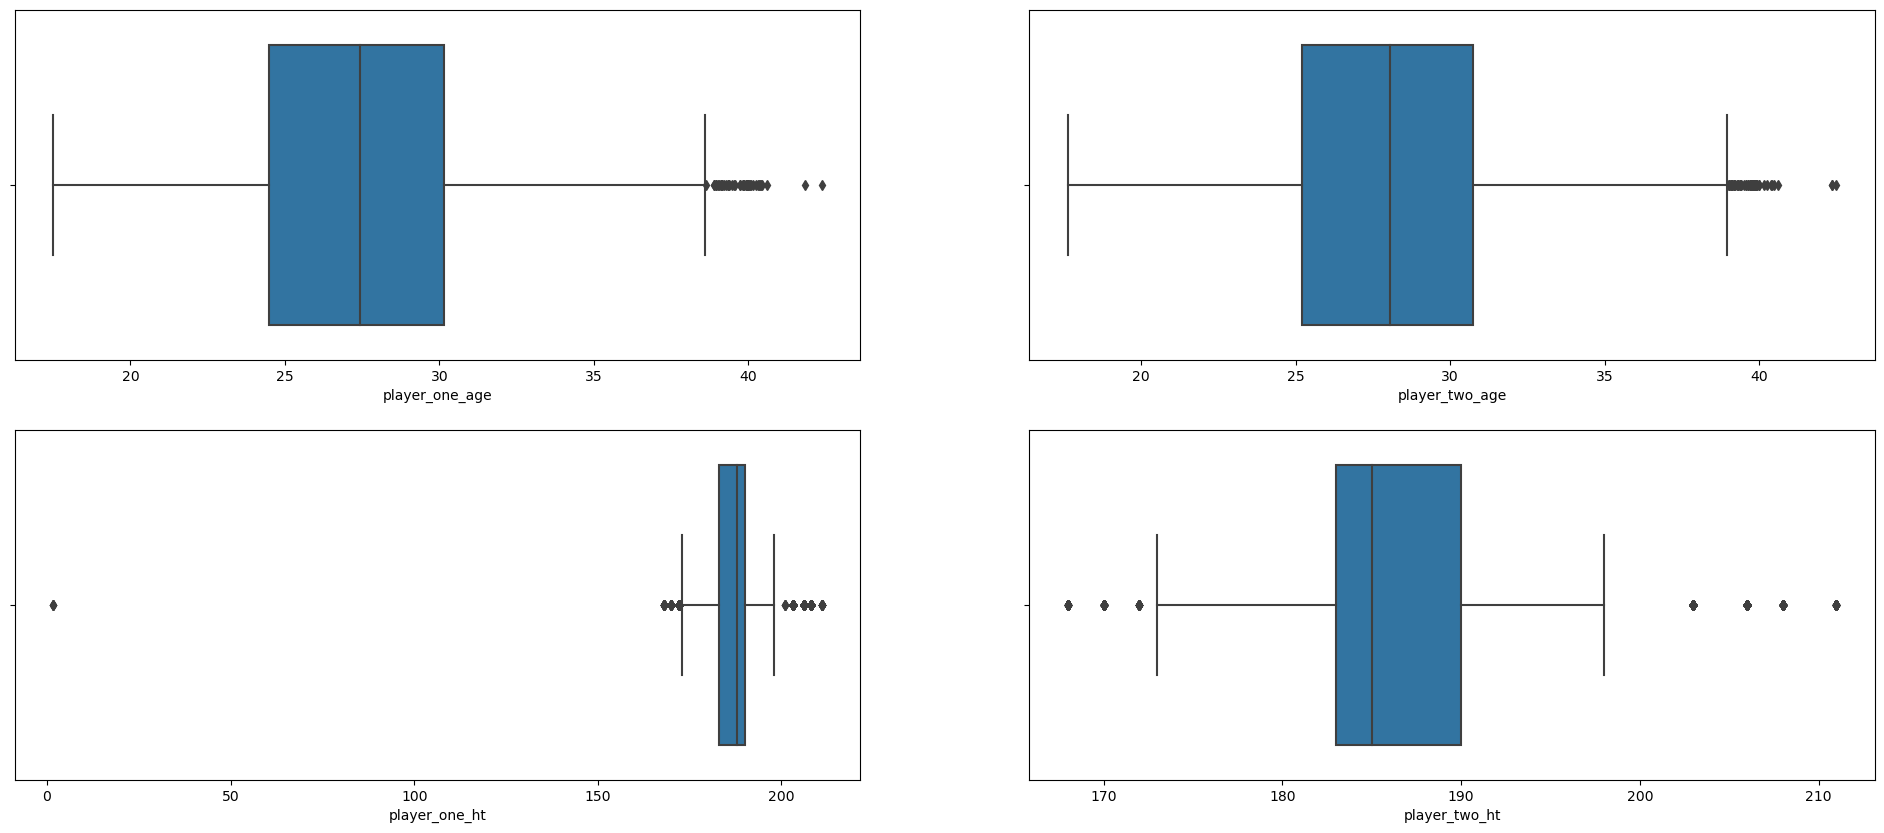

In [15]:
figbi, axesbi = plt.subplots(2, 2, figsize=(24, 10))
sns.boxplot(x="player_one_age", data=data, ax=axesbi[0, 0])
sns.boxplot(x="player_two_age", data=data, ax=axesbi[0, 1])
sns.boxplot(x="player_one_ht", data=data, ax=axesbi[1, 0])
sns.boxplot(x="player_two_ht", data=data, ax=axesbi[1, 1])



<Axes: ylabel='player_two_df'>

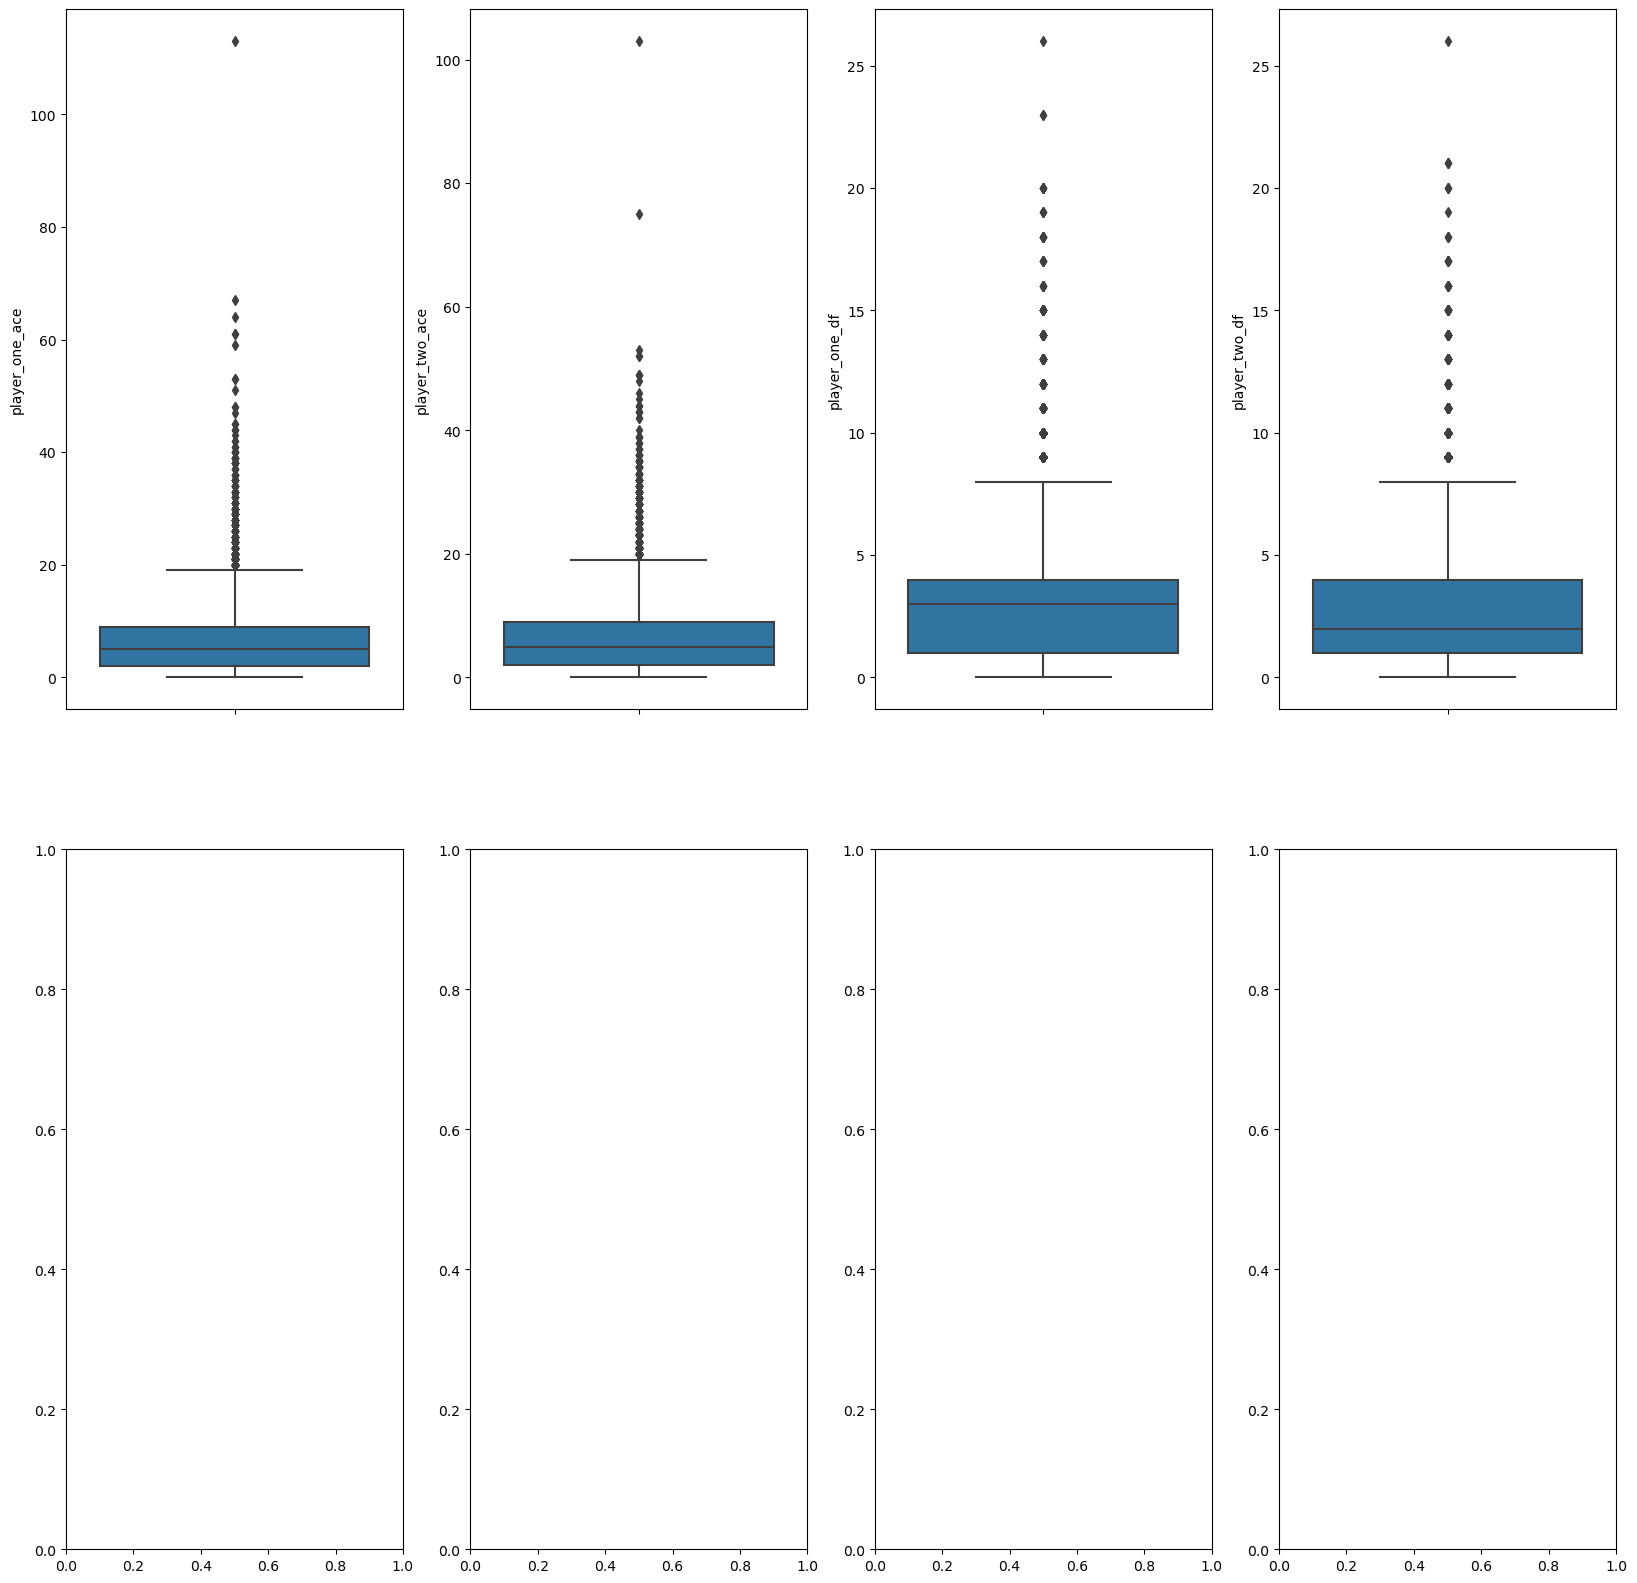

In [16]:
figbi, axesbi = plt.subplots(2, 4, figsize=(20, 20))
sns.boxplot(y="player_one_ace", data=data, orient="v", ax=axesbi[0, 0])
sns.boxplot(y="player_two_ace", data=data, orient="v", ax=axesbi[0, 1])
sns.boxplot(y="player_one_df", data=data, orient="v", ax=axesbi[0, 2])
sns.boxplot(y="player_two_df", data=data, orient="v", ax=axesbi[0, 3])
# sns.boxplot(y="player_one_break_point_saved", data=data, orient="v", ax=axesbi[1, 0])
# sns.boxplot(y="player_two_break_point_saved", data=data, orient="v", ax=axesbi[1, 1])
# sns.boxplot(y="player_one_break_point_faced", data=data, orient="v", ax=axesbi[1, 2])
# sns.boxplot(y="player_two_break_point_faced", data=data, orient="v", ax=axesbi[1, 3])


In [17]:
# Dropping the outlier data points
def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

outlier_count = 0
for col in ["player_one_age", "player_two_age"]:
    new_df = remove_outlier(data, col)
    outlier_count += data.shape[0] - new_df.shape[0]

print(f"Number of outliers to be removed: {outlier_count}")


Number of outliers to be removed: 110


In [18]:
def replace_with_max_min_limit(dataframe, variable):
    low_limit, up_limit = outlier(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

print(remove_outlier(data, "player_one_age").shape)
print(replace_with_max_min_limit(data, "player_one_age"))
print(remove_outlier(data, "player_two_age").shape)
print(replace_with_max_min_limit(data, "player_two_age"))

(25503, 24)
None
(25489, 24)
None


In [19]:
for col in num_cols:
    remove_outlier(data, col).shape
    replace_with_max_min_limit(data, col)


<Axes: xlabel='player_two_ht'>

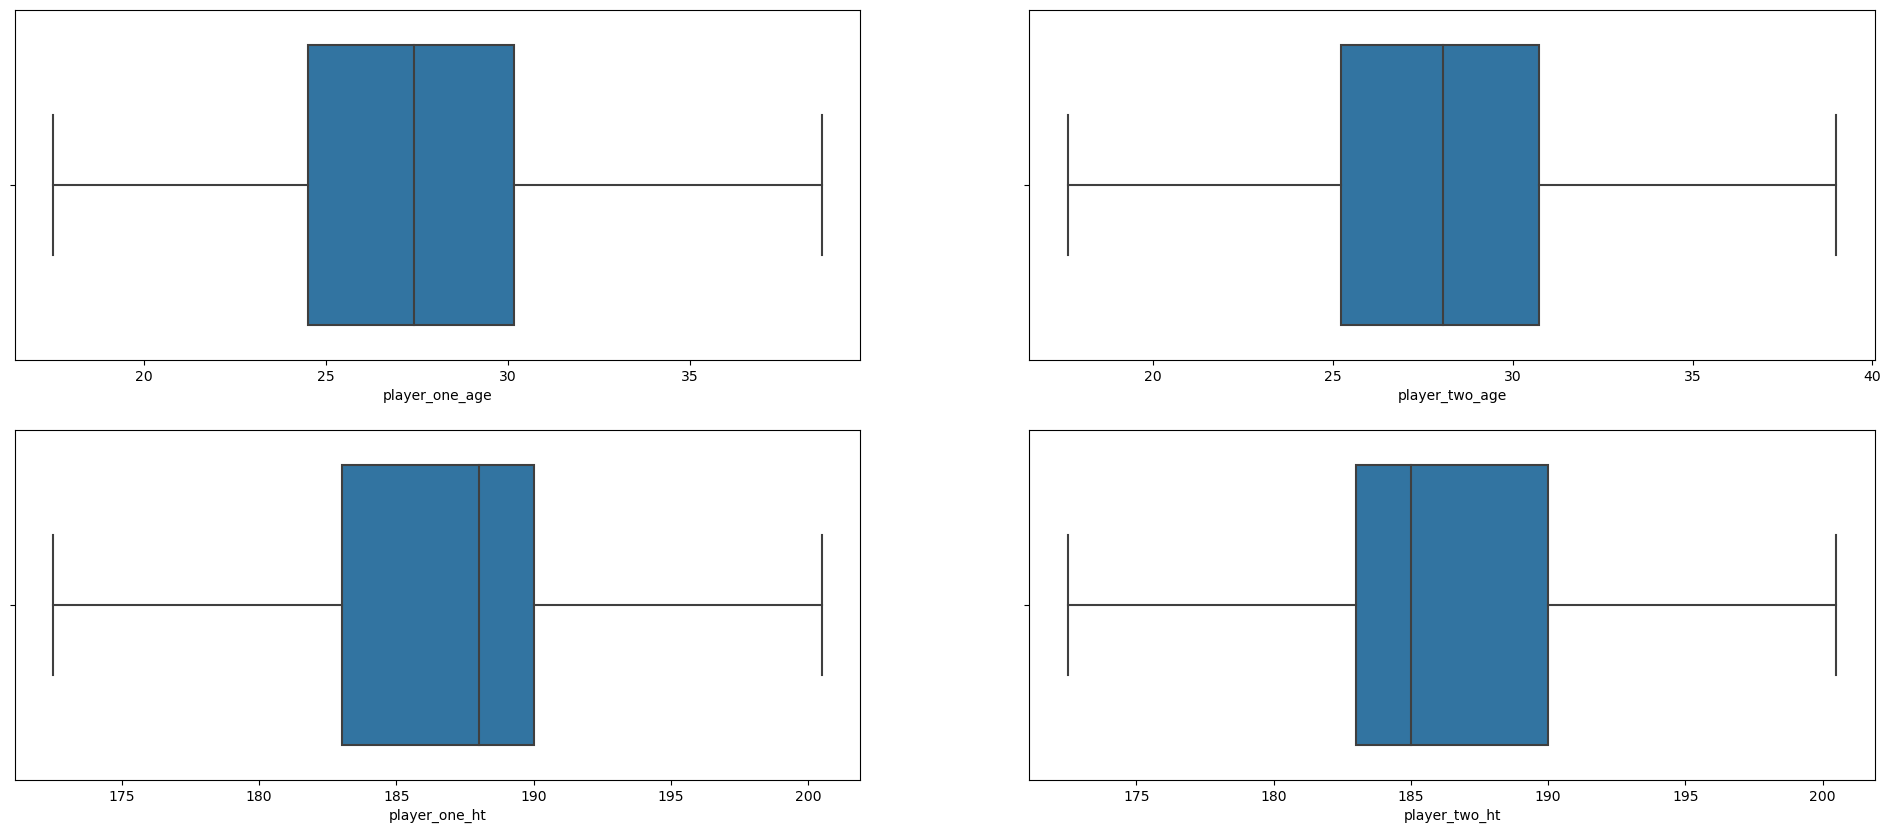

In [20]:
figbi, axesbi = plt.subplots(2, 2, figsize=(24, 10))
sns.boxplot(x="player_one_age", data=data, ax=axesbi[0, 0])
sns.boxplot(x="player_two_age", data=data, ax=axesbi[0, 1])
sns.boxplot(x="player_one_ht", data=data, ax=axesbi[1, 0])
sns.boxplot(x="player_two_ht", data=data, ax=axesbi[1, 1])



<Axes: ylabel='player_two_df'>

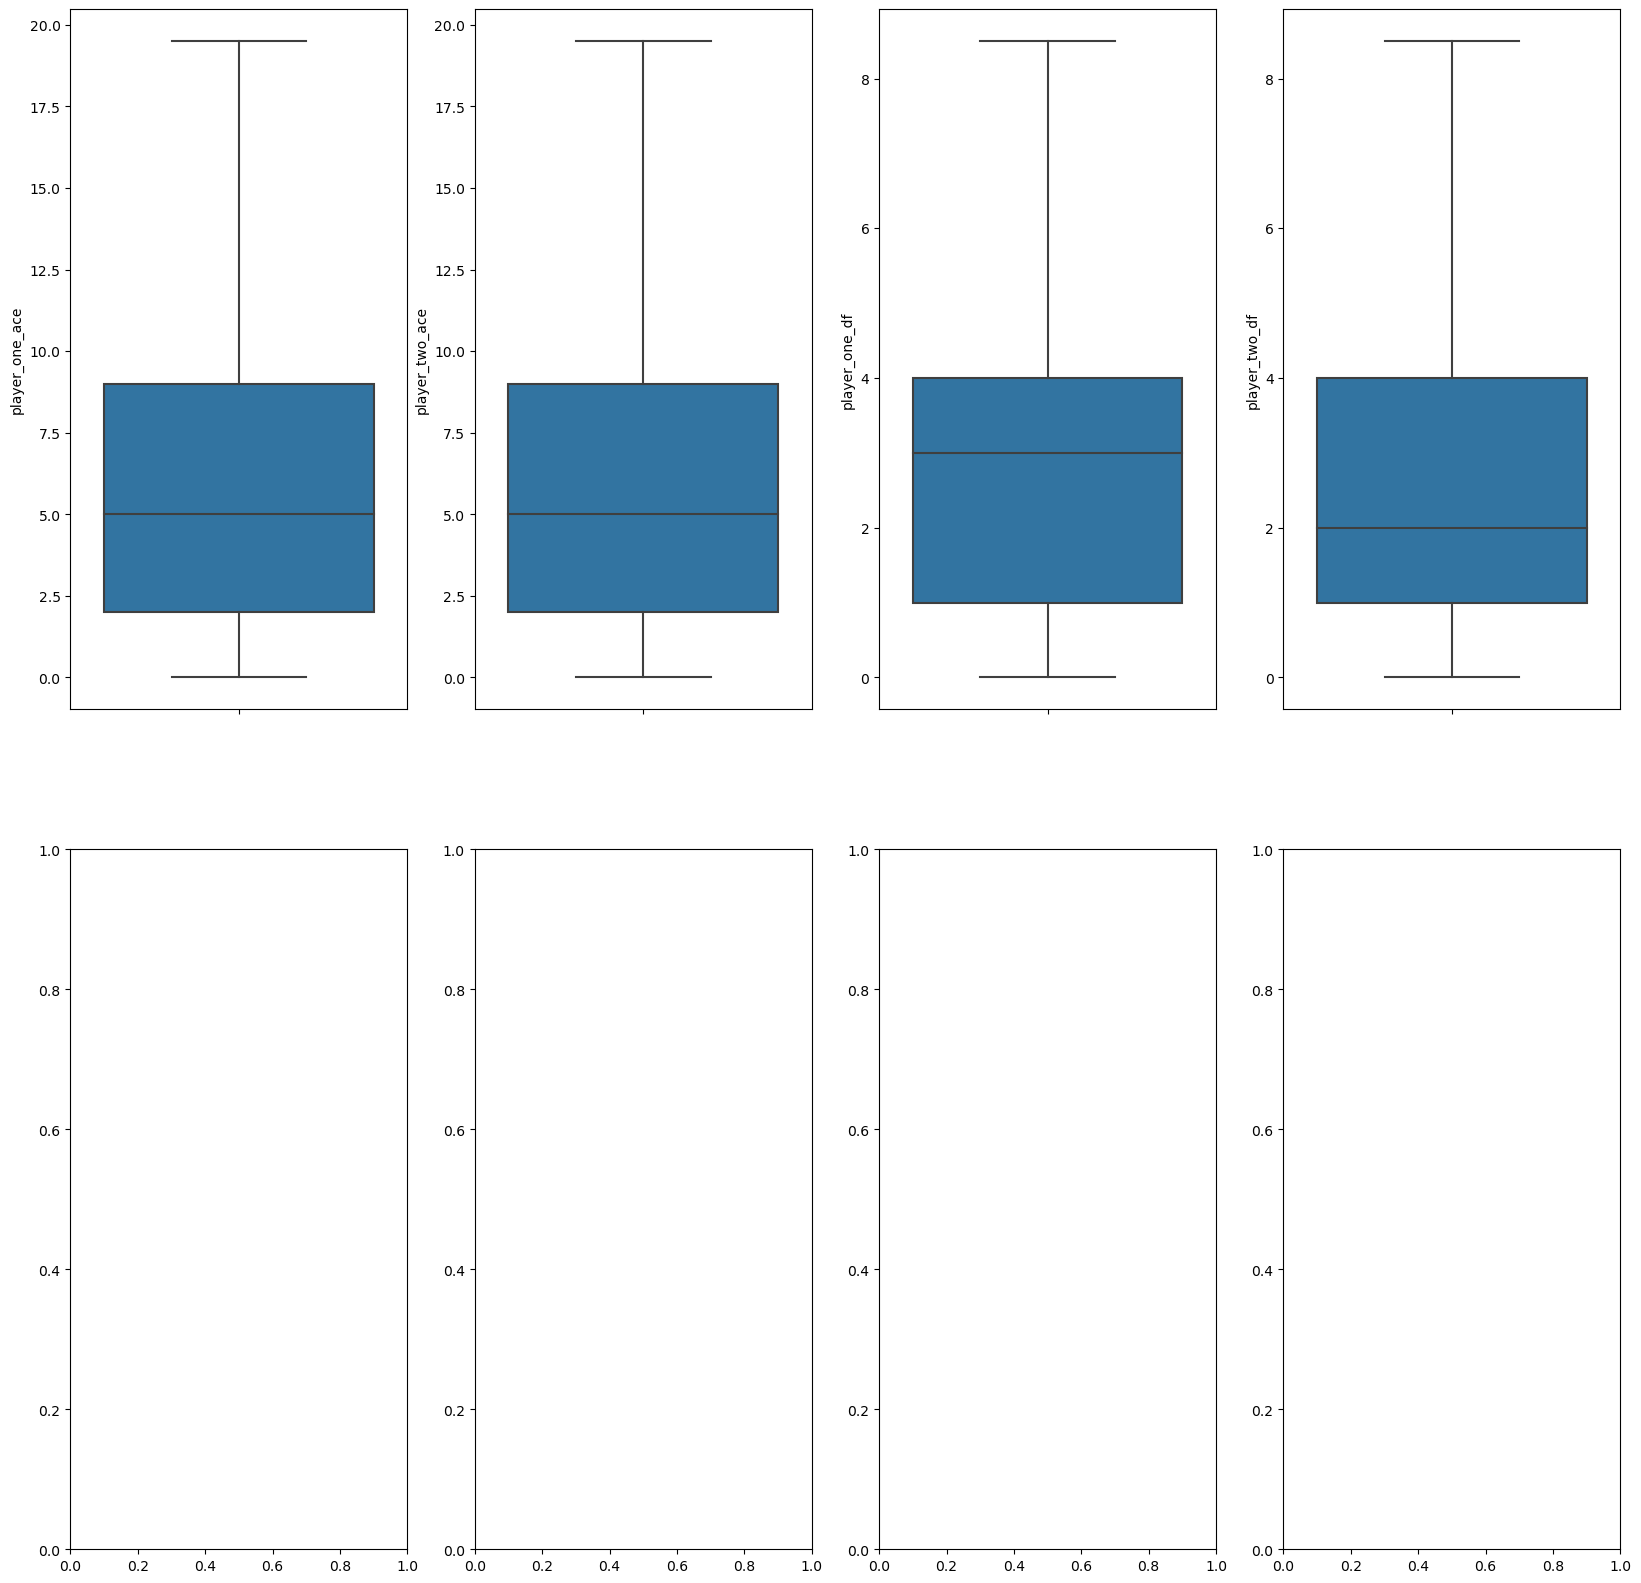

In [22]:
figbi, axesbi = plt.subplots(2, 4, figsize=(20, 20))
sns.boxplot(y="player_one_ace", data=data, orient="v", ax=axesbi[0, 0])
sns.boxplot(y="player_two_ace", data=data, orient="v", ax=axesbi[0, 1])
sns.boxplot(y="player_one_df", data=data, orient="v", ax=axesbi[0, 2])
sns.boxplot(y="player_two_df", data=data, orient="v", ax=axesbi[0, 3])
# sns.boxplot(y="player_one_break_point_saved", data=data, orient="v", ax=axesbi[1, 0])
# sns.boxplot(y="player_two_break_point_saved", data=data, orient="v", ax=axesbi[1, 1])
# sns.boxplot(y="player_one_break_point_faced", data=data, orient="v", ax=axesbi[1, 2])
# sns.boxplot(y="player_two_break_point_faced", data=data, orient="v", ax=axesbi[1, 3])


<Axes: xlabel='player_two_ht', ylabel='Count'>

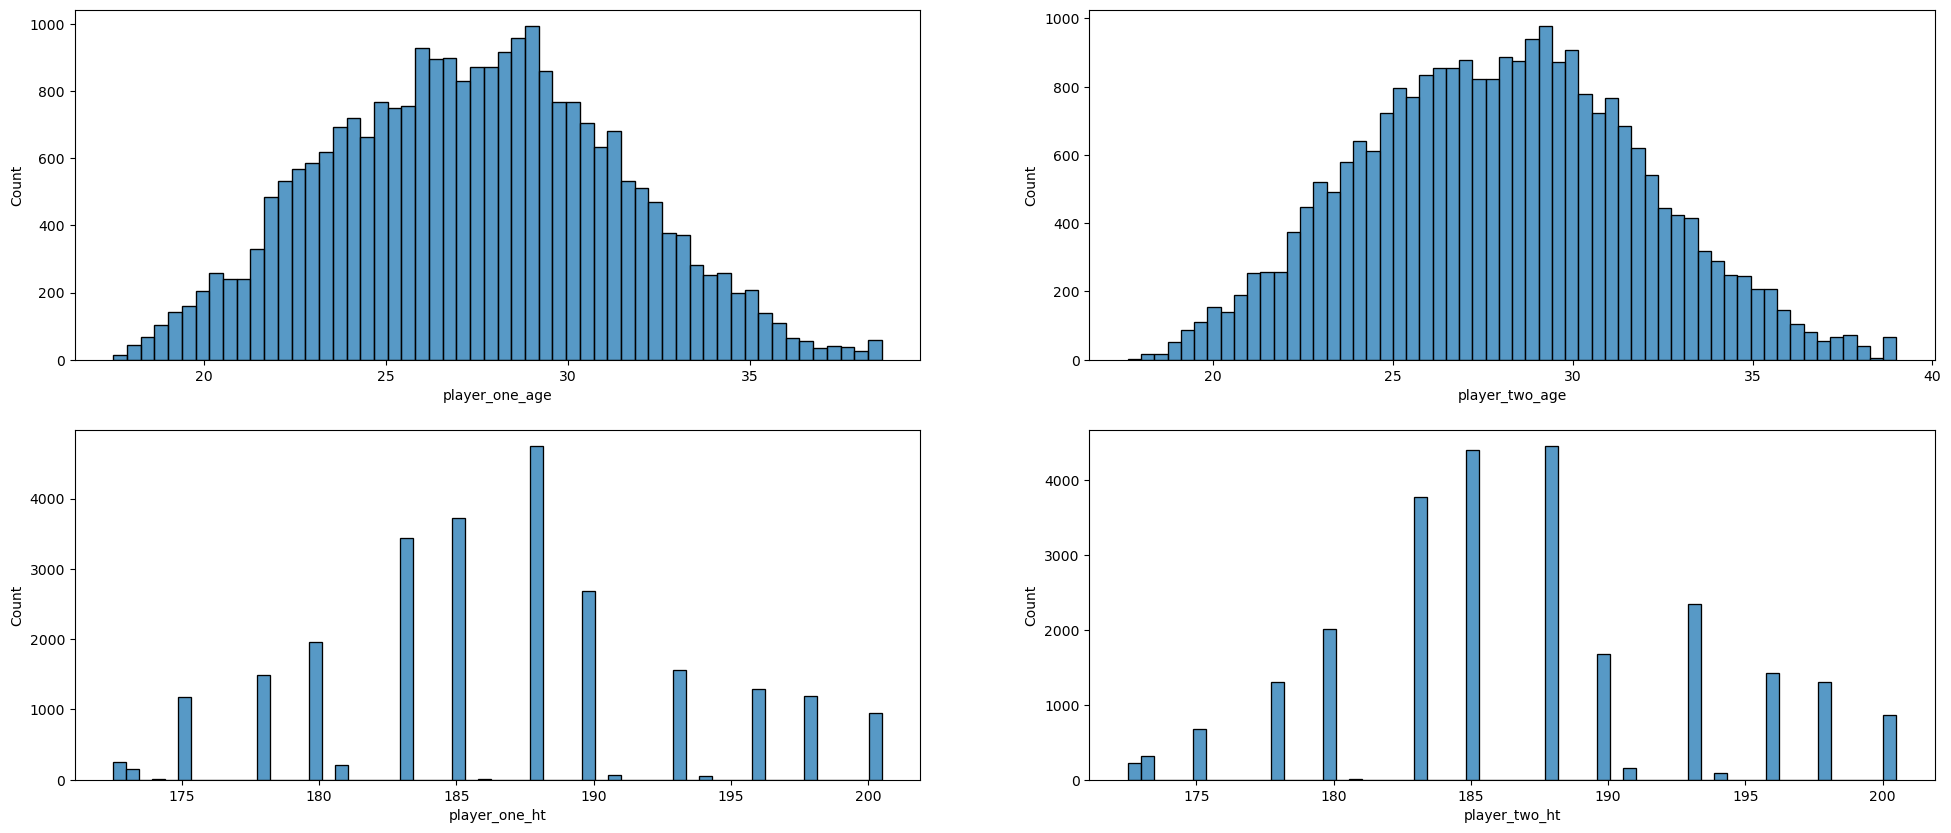

In [23]:
figbi, axesbi = plt.subplots(2, 2, figsize=(24, 10))
sns.histplot(x="player_one_age", data=data, ax=axesbi[0, 0])
sns.histplot(x="player_two_age", data=data, ax=axesbi[0, 1])
sns.histplot(x="player_one_ht", data=data, ax=axesbi[1, 0])
sns.histplot(x="player_two_ht", data=data, ax=axesbi[1, 1])



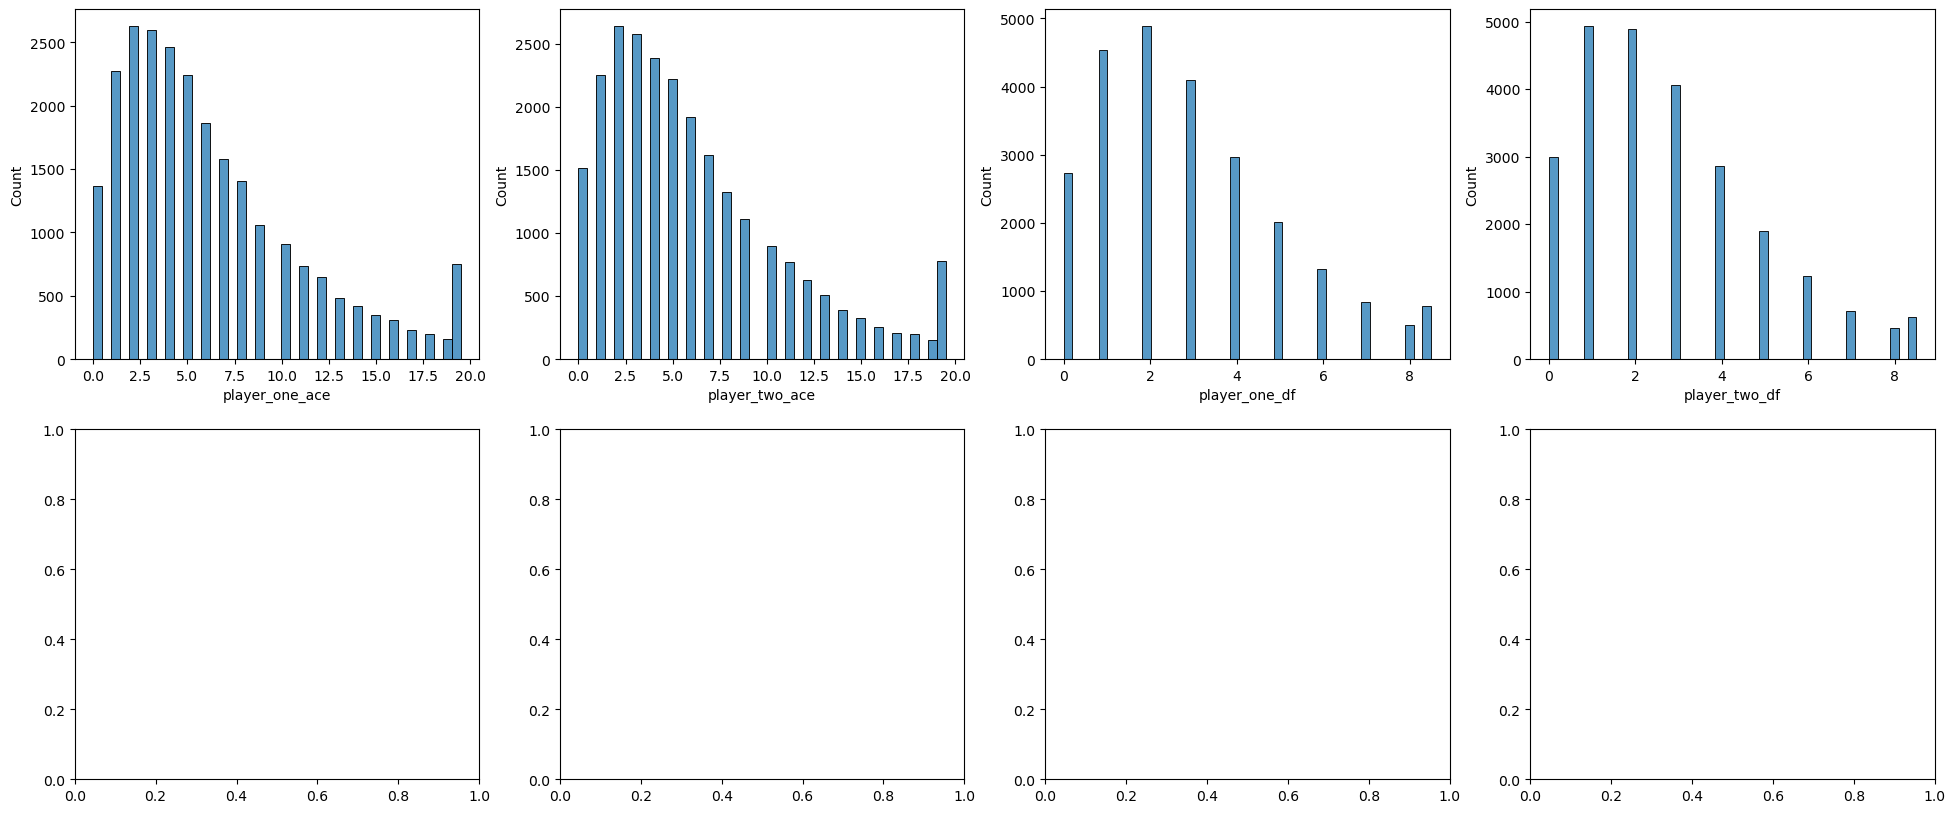

In [25]:
fig, axes = plt.subplots(2, 4, figsize=(24, 10))

# plot histograms of various tennis statistics for two players
sns.histplot(x="player_one_ace", data=data, ax=axes[0, 0])
sns.histplot(x="player_two_ace", data=data, ax=axes[0, 1])
sns.histplot(x="player_one_df", data=data, ax=axes[0, 2])
sns.histplot(x="player_two_df", data=data, ax=axes[0, 3])
# sns.histplot(x="player_one_break_point_saved", data=data, ax=axes[1, 0])
# sns.histplot(x="player_two_break_point_saved", data=data, ax=axes[1, 1])
# sns.histplot(x="player_one_break_point_faced", data=data, ax=axes[1, 2])
# sns.histplot(x="player_two_break_point_faced", data=data, ax=axes[1, 3])

# display the plot
plt.show()

In [26]:
data.to_csv("Tennis_cleaned_data.csv",index=False)

In [27]:
import glob
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [28]:
data = pd.read_csv("Tennis_cleaned_data.csv")

In [29]:
data

,tourney_date,tourney_name,tourney_level,surface,player_one_id,player_one,player_two_id,player_two,player_one_ht,player_two_ht,...,player_one_df,player_two_df,player_one_rank,player_two_rank,player_one_rank_points,player_two_rank_points,FTR,player_one_elo_rating,player_two_elo_rating,surface_encoded
0,2010-01-03,Brisbane,A,Hard,104053,Andy Roddick,103429,Peter Luczak,188.0,183.0,...,0.0,2.0,7.0,77.0,2977.5,598.0,W,2204,1689.0,3
1,2010-01-03,Brisbane,A,Hard,104958,Carsten Ball,104999,Mischa Zverev,198.0,190.0,...,3.0,2.0,134.0,78.0,400.0,590.0,W,1808,1810.0,3
2,2010-01-03,Brisbane,A,Hard,103813,Jarkko Nieminen,104755,Richard Gasquet,185.0,185.0,...,0.0,4.0,88.0,52.0,568.0,850.0,L,1882,2030.0,3
3,2010-01-03,Brisbane,A,Hard,104571,Marcos Baghdatis,103888,Mardy Fish,183.0,188.0,...,5.0,3.0,42.0,55.0,945.0,790.0,W,2010,1967.0,3
4,2010-01-03,Brisbane,A,Hard,103248,Harel Levy,103566,Michael Llodra,185.0,190.0,...,0.0,0.0,119.0,67.0,461.0,649.0,W,1752,1919.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25546,2022-03-04,Davis Cup QLS R1: ITA vs SVK,D,Hard,107733,Lorenzo Musetti,105613,Norbert Gombos,185.0,193.0,...,1.0,1.0,57.0,110.0,1000.0,620.0,W,1836,1767.0,3
25547,2022-03-04,Davis Cup QLS R1: KAZ vs NOR,D,Hard,107733,Casper Ruud,105062,Mikhail Kukushkin,183.0,183.0,...,1.0,0.0,8.0,160.0,2977.5,386.0,W,2129,1748.0,3
25548,2022-03-04,Davis Cup QLS R1: KAZ vs NOR,D,Hard,107733,Alexander Bublik,107380,Viktor Durasovic,196.0,185.0,...,0.0,1.0,32.0,174.5,1416.0,143.0,W,1937,1570.0,3
25549,2022-03-04,Davis Cup QLS R1: KAZ vs NOR,D,Hard,107733,Alexander Bublik,107380,Casper Ruud,196.0,183.0,...,6.0,3.0,32.0,8.0,1416.0,3281.0,W,1937,2129.0,3


In [30]:
data = data.dropna()

In [31]:
data

,tourney_date,tourney_name,tourney_level,surface,player_one_id,player_one,player_two_id,player_two,player_one_ht,player_two_ht,...,player_one_df,player_two_df,player_one_rank,player_two_rank,player_one_rank_points,player_two_rank_points,FTR,player_one_elo_rating,player_two_elo_rating,surface_encoded
0,2010-01-03,Brisbane,A,Hard,104053,Andy Roddick,103429,Peter Luczak,188.0,183.0,...,0.0,2.0,7.0,77.0,2977.5,598.0,W,2204,1689.0,3
1,2010-01-03,Brisbane,A,Hard,104958,Carsten Ball,104999,Mischa Zverev,198.0,190.0,...,3.0,2.0,134.0,78.0,400.0,590.0,W,1808,1810.0,3
2,2010-01-03,Brisbane,A,Hard,103813,Jarkko Nieminen,104755,Richard Gasquet,185.0,185.0,...,0.0,4.0,88.0,52.0,568.0,850.0,L,1882,2030.0,3
3,2010-01-03,Brisbane,A,Hard,104571,Marcos Baghdatis,103888,Mardy Fish,183.0,188.0,...,5.0,3.0,42.0,55.0,945.0,790.0,W,2010,1967.0,3
4,2010-01-03,Brisbane,A,Hard,103248,Harel Levy,103566,Michael Llodra,185.0,190.0,...,0.0,0.0,119.0,67.0,461.0,649.0,W,1752,1919.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25546,2022-03-04,Davis Cup QLS R1: ITA vs SVK,D,Hard,107733,Lorenzo Musetti,105613,Norbert Gombos,185.0,193.0,...,1.0,1.0,57.0,110.0,1000.0,620.0,W,1836,1767.0,3
25547,2022-03-04,Davis Cup QLS R1: KAZ vs NOR,D,Hard,107733,Casper Ruud,105062,Mikhail Kukushkin,183.0,183.0,...,1.0,0.0,8.0,160.0,2977.5,386.0,W,2129,1748.0,3
25548,2022-03-04,Davis Cup QLS R1: KAZ vs NOR,D,Hard,107733,Alexander Bublik,107380,Viktor Durasovic,196.0,185.0,...,0.0,1.0,32.0,174.5,1416.0,143.0,W,1937,1570.0,3
25549,2022-03-04,Davis Cup QLS R1: KAZ vs NOR,D,Hard,107733,Alexander Bublik,107380,Casper Ruud,196.0,183.0,...,6.0,3.0,32.0,8.0,1416.0,3281.0,W,1937,2129.0,3


In [32]:
data.isna().sum()

tourney_date              0
tourney_name              0
tourney_level             0
surface                   0
player_one_id             0
player_one                0
player_two_id             0
player_two                0
player_one_ht             0
player_two_ht             0
player_one_age            0
player_two_age            0
player_one_ace            0
player_two_ace            0
player_one_df             0
player_two_df             0
player_one_rank           0
player_two_rank           0
player_one_rank_points    0
player_two_rank_points    0
FTR                       0
player_one_elo_rating     0
player_two_elo_rating     0
surface_encoded           0
dtype: int64

In [33]:
data.dtypes

tourney_date               object
tourney_name               object
tourney_level              object
surface                    object
player_one_id               int64
player_one                 object
player_two_id               int64
player_two                 object
player_one_ht             float64
player_two_ht             float64
player_one_age            float64
player_two_age            float64
player_one_ace            float64
player_two_ace            float64
player_one_df             float64
player_two_df             float64
player_one_rank           float64
player_two_rank           float64
player_one_rank_points    float64
player_two_rank_points    float64
FTR                        object
player_one_elo_rating       int64
player_two_elo_rating     float64
surface_encoded             int64
dtype: object

In [34]:
df = data.copy()

In [37]:
from sklearn import preprocessing
df["surface"] = preprocessing.LabelEncoder.fit_transform(df,df["surface"])
df["player_one_hand"] = preprocessing.LabelEncoder.fit_transform(df,df["player_one_hand"])
df["player_two_hand"] = preprocessing.LabelEncoder.fit_transform(df,df["player_two_hand"])

KeyError: 'player_two_hand'

In [ ]:
df.dtypes

In [38]:
import numpy as np
df["surface"] = np.int64(df["surface"])

In [39]:
df["player_one_hand"] = np.int64(df["player_one_hand"])

KeyError: 'player_one_hand'

In [36]:
df["player_two_hand"] = np.int64(df["player_two_hand"])

KeyError: 'player_two_hand'

In [41]:
df.columns

Index(['tourney_date', 'tourney_name', 'tourney_level', 'surface',
       'player_one_id', 'player_one', 'player_two_id', 'player_two',
       'player_one_ht', 'player_two_ht', 'player_one_age', 'player_two_age',
       'player_one_ace', 'player_two_ace', 'player_one_df', 'player_two_df',
       'player_one_rank', 'player_two_rank', 'player_one_rank_points',
       'player_two_rank_points', 'FTR', 'player_one_elo_rating',
       'player_two_elo_rating', 'surface_encoded'],
      dtype='object')

In [42]:
X = df.drop(["tourney_date","FTR","player_one","player_two"],1)
y = df["FTR"]

In [43]:
X

,tourney_name,tourney_level,surface,player_one_id,player_two_id,player_one_ht,player_two_ht,player_one_age,player_two_age,player_one_ace,player_two_ace,player_one_df,player_two_df,player_one_rank,player_two_rank,player_one_rank_points,player_two_rank_points,player_one_elo_rating,player_two_elo_rating,surface_encoded
0,Brisbane,A,3,104053,103429,188.0,183.0,27.348392,30.346338,15.0,4.0,0.0,2.0,7.0,77.0,2977.5,598.0,2204,1689.0,3
1,Brisbane,A,3,104958,104999,198.0,190.0,22.543463,22.370979,10.0,2.0,3.0,2.0,134.0,78.0,400.0,590.0,1808,1810.0,3
2,Brisbane,A,3,103813,104755,185.0,185.0,28.451745,23.548255,4.0,5.0,0.0,4.0,88.0,52.0,568.0,850.0,1882,2030.0,3
3,Brisbane,A,3,104571,103888,183.0,188.0,24.550308,28.071184,7.0,7.0,5.0,3.0,42.0,55.0,945.0,790.0,2010,1967.0,3
4,Brisbane,A,3,103248,103566,185.0,190.0,31.416838,29.631759,8.0,0.0,0.0,0.0,119.0,67.0,461.0,649.0,1752,1919.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25546,Davis Cup QLS R1: ITA vs SVK,D,3,107733,105613,185.0,193.0,19.991786,31.545517,6.0,1.0,1.0,1.0,57.0,110.0,1000.0,620.0,1836,1767.0,3
25547,Davis Cup QLS R1: KAZ vs NOR,D,3,107733,105062,183.0,183.0,23.186858,34.176591,10.0,2.0,1.0,0.0,8.0,160.0,2977.5,386.0,2129,1748.0,3
25548,Davis Cup QLS R1: KAZ vs NOR,D,3,107733,107380,196.0,185.0,24.700890,24.947296,13.0,2.0,0.0,1.0,32.0,174.5,1416.0,143.0,1937,1570.0,3
25549,Davis Cup QLS R1: KAZ vs NOR,D,3,107733,107380,196.0,183.0,24.700890,23.186858,14.0,9.0,6.0,3.0,32.0,8.0,1416.0,3281.0,1937,2129.0,3


In [44]:
import xgboost
from xgboost import XGBClassifier
xgb_model= XGBClassifier(colsample_bytree = 0.749816047538945, gamma = 0.9507143064099162, learning_rate = 0.0831993941811405, max_depth = 7, min_child_weight = 5, n_estimators = 152, reg_alpha = 0.44583275285359114, reg_lambda = 0.09997491581800289, subsample = 0.7836995567863468,use_label_encoder=True)
xgb_model.fit(X, y)
y_pred = xgb_model.predict(X)
predictions = [value for value in y_pred]
accuracy = accuracy_score(y, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['L' 'W']

In [ ]:
from sklearn.metrics import calassification_report


In [ ]:
print(classification_report(y,predictions))

In [ ]:
y_pred_pred = xgb_model.predict_proba(X)

In [ ]:
data["Lose_prob"] =y_pred_pred[:,0] * 100

In [ ]:
data["win_prob"] = y_pred_pred[:,1] * 100

In [ ]:
data["predictions"] = predictions

In [ ]:
data

In [ ]:
import pickle
file_name = "xgb_tennis_model.pkl"

# save
pickle.dump(xgb_model, open(file_name, "wb"))

In [ ]:
df.dtypes